<a href="https://colab.research.google.com/github/ShriVarshaan/pytorch-learning-log/blob/main/pytorch_workflow_fundamentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch
from torch import nn #nn contains all of Pytorch's building blocks for neural networks
import matplotlib.pyplot as plt

torch.__version__

'2.6.0+cu124'

##Preparing and loading data

* Excel spreadsheets
* Images
* Video
* audio
* DNA
* Text

And many more

1) get data into numerical representation

2) build a model to learn patterns in that numerical representation

We will start with making a linear regression formula with know parameters

In [2]:
weight = 0.7 #w1
bias = 0.3 #w0

start = 0
end = 1
step = 0.02
X = torch.arange(start,end,step).unsqueeze(dim=1)
y = weight * X + bias

X

tensor([[0.0000],
        [0.0200],
        [0.0400],
        [0.0600],
        [0.0800],
        [0.1000],
        [0.1200],
        [0.1400],
        [0.1600],
        [0.1800],
        [0.2000],
        [0.2200],
        [0.2400],
        [0.2600],
        [0.2800],
        [0.3000],
        [0.3200],
        [0.3400],
        [0.3600],
        [0.3800],
        [0.4000],
        [0.4200],
        [0.4400],
        [0.4600],
        [0.4800],
        [0.5000],
        [0.5200],
        [0.5400],
        [0.5600],
        [0.5800],
        [0.6000],
        [0.6200],
        [0.6400],
        [0.6600],
        [0.6800],
        [0.7000],
        [0.7200],
        [0.7400],
        [0.7600],
        [0.7800],
        [0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [3]:
len(X), len(y)

(50, 50)

###Splitting data into training and test sets

In [4]:
train_split = int(0.8 * len(X))
X_train = X[:train_split]
y_train = y[:train_split]
X_test = X[train_split:]
y_test = y[train_split:]

#not using validation set yet as this is simple
len(X_train), len(y_train), len(X_test), len(y_test)

(40, 40, 10, 10)

In [5]:
X_train, y_train

(tensor([[0.0000],
         [0.0200],
         [0.0400],
         [0.0600],
         [0.0800],
         [0.1000],
         [0.1200],
         [0.1400],
         [0.1600],
         [0.1800],
         [0.2000],
         [0.2200],
         [0.2400],
         [0.2600],
         [0.2800],
         [0.3000],
         [0.3200],
         [0.3400],
         [0.3600],
         [0.3800],
         [0.4000],
         [0.4200],
         [0.4400],
         [0.4600],
         [0.4800],
         [0.5000],
         [0.5200],
         [0.5400],
         [0.5600],
         [0.5800],
         [0.6000],
         [0.6200],
         [0.6400],
         [0.6600],
         [0.6800],
         [0.7000],
         [0.7200],
         [0.7400],
         [0.7600],
         [0.7800]]),
 tensor([[0.3000],
         [0.3140],
         [0.3280],
         [0.3420],
         [0.3560],
         [0.3700],
         [0.3840],
         [0.3980],
         [0.4120],
         [0.4260],
         [0.4400],
         [0.4540],
         [

Visualising our data

Data explorer's motto - "visualise, visualise, visualise"

In [6]:
#plots training data, test data and compares predictions
def plot_predictions(train_data=X_train,
                     train_labels=y_train,
                     test_data=X_test,
                     test_labels=y_test,
                     predictions=None):
  plt.figure(figsize=(10,7))

  #Plotting training data in blue
  plt.scatter(train_data, train_labels, c="b", s=4, label="Training Data")

  #Plotting test data in green
  plt.scatter(test_data, test_labels, c="g", s=4, label="Testing Data")

  #if there are predictions we will plot them
  if predictions is not None:
    plt.scatter(test_data, predictions, c="r", s=4, label="Predictions")

  #showing the legend
  plt.legend(prop={"size":15})


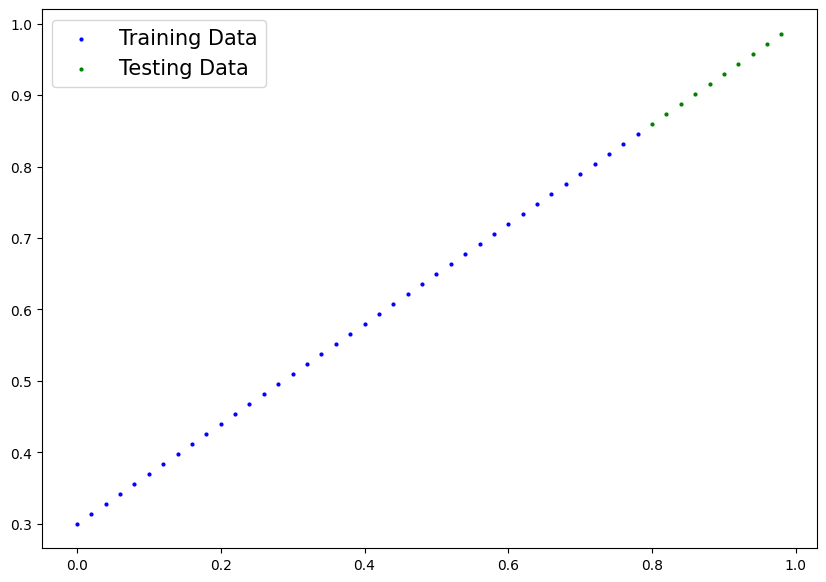

In [7]:
plot_predictions()

##Building pytorch model

We will be building a linear regression model

our model starts with random values and adjusts these values to get ideal values

We can do this in two ways

1) gradient descent

2) back propogation

In [14]:
class LinearRegressionModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.weights = nn.Parameter(torch.randn(1,
                                           requires_grad = True,
                                           dtype=torch.float)) #We have requires grad to True for gradient descent, pytorch will keep track of the gradients of the weights parameter and update them through gradient descent and back propogration
    self.bias = nn.Parameter(torch.randn(1,
                                        requires_grad = True, #This parameter can be updated via gradient descent
                                        dtype=torch.float))

    #any subclass of nn.Module requires a forward method
    #forward defines the computation performed by the model, in this case it is linear regression
  def forward(self, x: torch.Tensor) -> torch.Tensor:
    return self.weights * x + self.bias #This is the linear regression formula

###Pytorch model building essentials

* torch.nn -- contains all of the building blocks for computational graphs (a neural network can be considered a computational graph)

* torch.nn.Parameter -- the parameters our model needs to try and learn

* torch.nn.Module -- The base class for all neural network modules, if we subclass it we must override forward()

* torch.optim - this is where the optimizers are, helps with gradient descent

* def forward() -- All nn.Module subclasses require us to overwrite forward. This method defines what happens in the forward computation

In [15]:
#We will make a random seed as our model uses .randn
torch.manual_seed(42)

#Instance of the model that we have made
model_0 = LinearRegressionModel()
list(model_0.parameters())

[Parameter containing:
 tensor([0.3367], requires_grad=True),
 Parameter containing:
 tensor([0.1288], requires_grad=True)]

In [16]:
model_0.state_dict() #gives a dictionary which is easier to read than our list

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

###making predictions using torch.inference_mode()

To check our model's power we will see how well it predicts y_test based on X_test

We are doing this as of now without optimising our model's weight and bias

When we pass data through our model, it'll run through the forward() method

In [17]:
X_test

tensor([[0.8000],
        [0.8200],
        [0.8400],
        [0.8600],
        [0.8800],
        [0.9000],
        [0.9200],
        [0.9400],
        [0.9600],
        [0.9800]])

In [27]:
#this is a context manager, can be done directly without it but put this in
# It basically turns off gradient tracking which makes it faster as pytorch has to keep track of a lesser amount of data
#can use torch.no_grad() as well but inference_mode() is better and newer
with torch.inference_mode():
  y_preds = model_0(X_test)

y_preds

tensor([[0.3982],
        [0.4049],
        [0.4116],
        [0.4184],
        [0.4251],
        [0.4318],
        [0.4386],
        [0.4453],
        [0.4520],
        [0.4588]])

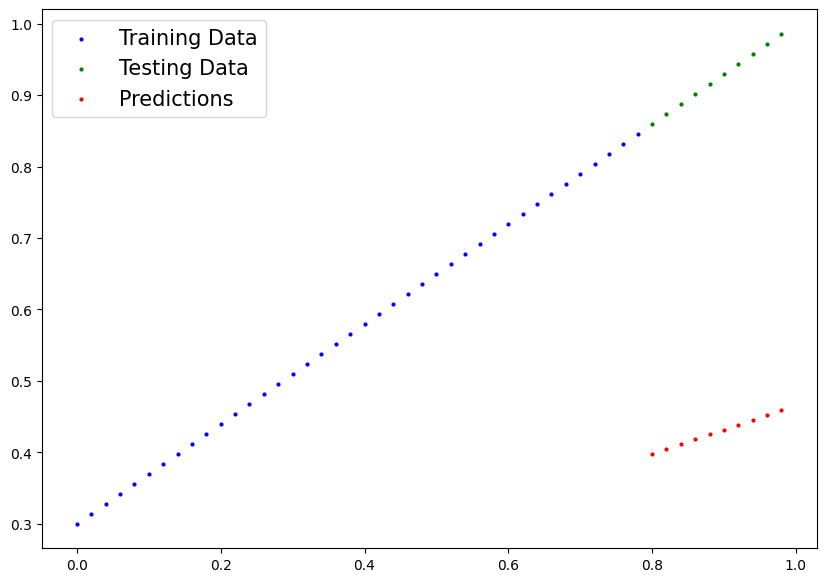

In [28]:
plot_predictions(predictions=y_preds) #The predictions are far off as we haven't trained our model yet, we have just run it using the random initial values

###Training our model

We need a loss function

We need an optimizer, which takes into account the loss of a model and adjusts our parameters

In [29]:
model_0.state_dict()

OrderedDict([('weights', tensor([0.3367])), ('bias', tensor([0.1288]))])

In [33]:
#Setting up a loss function
loss_fn = nn.L1Loss()

#Setting up an optimizer
#stochastic gradient descent
#lr is the learning rate
optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr=0.01)